# Ongoing project: 

The assumption throughout the proposal stage was to investigate deep learning timeseries analysis. During the analysis and data processing stages, we discovered that the majority of the data is irrelevant to the presented problem and the existing dataset is not a time series data set. and The focus then shifted to patient flow visualization with Sankey and prediction with machine learning. Exploring how regression, probablistic, random forest, and neural networks act on aggregated data in particular.

Coded by Geletaw and Active collobrator Asaye and Balew


# Patient flow visualization and prediction in the South-Western Ethiopian health network cluster

Predictiong patient flow based on a network cluster in South-Western Ethiopia using aggregated data. One specilized hospital, three general hospital, 6 primary hospital and 12 health centers. It's ongoing project. The result will be sent for publication within this month

# Dataset description
A total of 4 years dataset from 2011E.C  to 2014 E.C. (2019 to date).

The dataset contains monthly aggregated data with the variables listed below.

1. 'Category', 
2. 'Name', 
3. 'Referral_in_from', 
4. 'Referral_out_to', 
5. 'Age Group',
6. 'Gender', 
7. 'Activity', 
8.  'Month', 
9.  'Year', 
10.  'OTP_Visit_Value'


# Challenge 

How do machine learning algorithms react and anticipate patient flow when using monthly level aggregated datasets? What potential insights may it generate? The month of the report and the dataset in developing countries were found in aggregated data format. Obtaining raw datasets is difficult and remain in paper-based work.

Install libraries 

In [4]:
!pip3 install keras

In [5]:
!pip install -U -q PyDrive

In [6]:
from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials

Authentication credentials

In [7]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

Download files

In [8]:
# https://drive.google.com/file/d/1oAHkWNC1PMmuWU8ih1rvQVoUGl0115nr/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1oAHkWNC1PMmuWU8ih1rvQVoUGl0115nr'})

In [9]:
fileDownloaded.GetContentFile('patientflowtrend.csv')

Import libraries 

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from datetime import datetime
# Import label encoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
import tensorflow as tf 
from keras import Model
from keras.layers import Dense
from keras.models import Sequential

Import files

In [80]:
pfdf = pd.read_csv('patientflowtrend.csv' )

Exploratory Data Analysis

In [81]:
pfdf.head()

,Category,Name,Referral_in_from,Referral_out_to,Age Group,Gender,Activity,Month,Year,OTP_Visit_Value
0,SH,JUSH,GH,SH,<5,Male,Outpatient visits,Oct,2011,273
1,SH,JUSH,GH,SH,<5,Female,Outpatient visits,Oct,2011,382
2,SH,JUSH,GH,SH,5-10,Male,Outpatient visits,Oct,2011,314
3,SH,JUSH,GH,SH,5-10,Female,Outpatient visits,Oct,2011,512
4,SH,JUSH,GH,SH,11-19,Male,Outpatient visits,Oct,2011,"1,247"


In [82]:
pfdf.dtypes

Category            object
Name                object
Referral_in_from    object
Referral_out_to     object
Age Group           object
Gender              object
Activity            object
Month               object
Year                 int64
OTP_Visit_Value     object
dtype: object

In [83]:
pfdf['Year'] =  pfdf['Year'].astype(str)
pfdf.dtypes

Category            object
Name                object
Referral_in_from    object
Referral_out_to     object
Age Group           object
Gender              object
Activity            object
Month               object
Year                object
OTP_Visit_Value     object
dtype: object

In [84]:

# pfdf["date"] = pfdf["Year"] + '-' + pfdf["Month"]

In [86]:
#pfdf.head()

In [87]:
# pfdf["date"] = pd.to_datetime(pfdf["date"])

In [88]:
pfdf['OTP_Visit_Value'] = pfdf['OTP_Visit_Value'].str.replace(',', '').astype(float)

In [18]:
pfdf.dtypes

Category                    object
Name                        object
Referral_in_from            object
Referral_out_to             object
Age Group                   object
Gender                      object
Activity                    object
Month                       object
Year                        object
OTP_Visit_Value            float64
date                datetime64[ns]
dtype: object

In [89]:
pfdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          11760 non-null  object 
 1   Name              11760 non-null  object 
 2   Referral_in_from  11760 non-null  object 
 3   Referral_out_to   11760 non-null  object 
 4   Age Group         11760 non-null  object 
 5   Gender            11760 non-null  object 
 6   Activity          11760 non-null  object 
 7   Month             11760 non-null  object 
 8   Year              11760 non-null  object 
 9   OTP_Visit_Value   11760 non-null  float64
dtypes: float64(1), object(9)
memory usage: 918.9+ KB


KDE plot

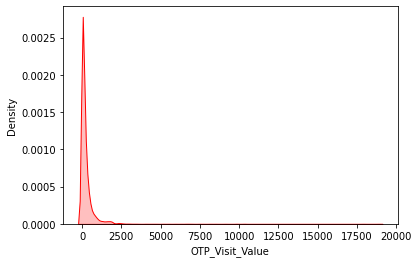

In [90]:
res = sns.kdeplot(pfdf['OTP_Visit_Value'], color='red', shade='True')
plt.show()

Outlier detection

In [96]:
pfdf['OTP_Visit_Value'].mean()

235.15705782312926

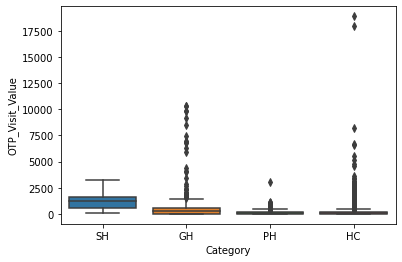

In [92]:
#pfdf.boxplot(by ='OTP_Visit_Value', grid = False)

sns.boxplot(x = 'Category', y = 'OTP_Visit_Value', data = pfdf)

In [94]:
Q1 = pfdf['OTP_Visit_Value'].quantile(0.25)
Q3 = pfdf['OTP_Visit_Value'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (pfdf['OTP_Visit_Value'] >= Q1-1.5 * IQR) & (pfdf['OTP_Visit_Value'] <= Q3 + 1.5 *IQR)
pfdf_filter = pfdf.loc[filter]  

In [98]:
pfdf_filter['OTP_Visit_Value'].mean()

125.6870564064251

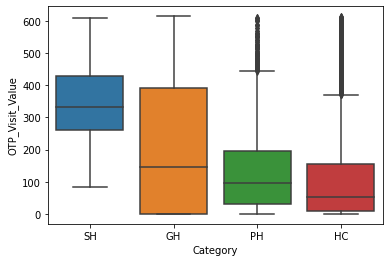

In [95]:
sns.boxplot(x = 'Category', y = 'OTP_Visit_Value', data = pfdf_filter)

### Stratgey -**I**

Employing regression

In [101]:
pfdf_filtered = pfdf_filter
pfdf_filtered.head()

,Category,Name,Referral_in_from,Referral_out_to,Age Group,Gender,Activity,Month,Year,OTP_Visit_Value
0,SH,JUSH,GH,SH,<5,Male,Outpatient visits,Oct,2011,273.0
1,SH,JUSH,GH,SH,<5,Female,Outpatient visits,Oct,2011,382.0
2,SH,JUSH,GH,SH,5-10,Male,Outpatient visits,Oct,2011,314.0
3,SH,JUSH,GH,SH,5-10,Female,Outpatient visits,Oct,2011,512.0
13,SH,JUSH,GH,SH,>=66,Female,Outpatient visits,Oct,2011,324.0


In [104]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
pfdf_filtered['Category']= label_encoder.fit_transform(pfdf_filtered['Category'])
pfdf_filtered['Name']= label_encoder.fit_transform(pfdf_filtered['Name'])
pfdf_filtered['Referral_in_from']= label_encoder.fit_transform(pfdf_filtered['Referral_in_from'])
pfdf_filtered['Referral_out_to']= label_encoder.fit_transform(pfdf_filtered['Referral_out_to'])
pfdf_filtered['Age Group']= label_encoder.fit_transform(pfdf_filtered['Age Group'])
pfdf_filtered['Activity']= label_encoder.fit_transform(pfdf_filtered['Activity'])
pfdf_filtered['Month']= label_encoder.fit_transform(pfdf_filtered['Month'])
pfdf_filtered['Gender']= label_encoder.fit_transform(pfdf_filtered['Gender'])
pfdf_filtered.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Category,Name,Referral_in_from,Referral_out_to,Age Group,Gender,Activity,Month,Year,OTP_Visit_Value
0,3,8,0,3,5,1,0,10,2011,273.0
1,3,8,0,3,5,0,0,10,2011,382.0
2,3,8,0,3,4,1,0,10,2011,314.0
3,3,8,0,3,4,0,0,10,2011,512.0
13,3,8,0,3,6,0,0,10,2011,324.0


In [105]:
pfdf_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Category,10708.0,1.165951,0.638577,0.0,1.0,1.0,2.00,3.0
Name,10708.0,10.061356,6.054998,0.0,5.0,10.0,15.00,20.0
Referral_in_from,10708.0,2.059115,0.947663,0.0,1.0,2.0,2.00,4.0
Referral_out_to,10708.0,1.347591,1.055315,0.0,0.0,2.0,2.00,3.0
Age Group,10708.0,3.032499,2.011146,0.0,1.0,3.0,5.00,6.0
Gender,10708.0,0.506350,0.499983,0.0,0.0,1.0,1.00,1.0
Activity,10708.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Month,10708.0,5.600019,3.451730,0.0,3.0,6.0,9.00,11.0
OTP_Visit_Value,10708.0,125.687056,144.400749,0.0,12.0,68.0,196.25,615.0


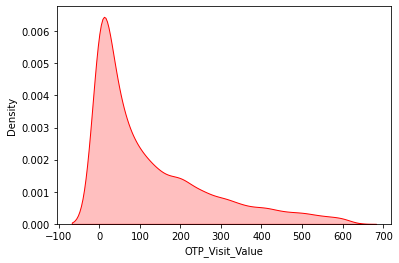

In [106]:
res = sns.kdeplot(pfdf_filtered['OTP_Visit_Value'], color='red', shade='True')
plt.show()

Train regression model

In [107]:
x = pfdf_filtered.drop('OTP_Visit_Value', axis=1)
y = pfdf_filtered['OTP_Visit_Value']

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

In [112]:
def linear_regression(x_train, x_test, y_train, y_test):
  # Create linear regression object
  regr = linear_model.LinearRegression()

  # Train the model using the training sets
  regr.fit(x_train, y_train)
  regr.fit(x_train, y_train)
  # Make predictions using the testing set
  y_pred = regr.predict(x_test)

  # The coefficients
  print("Coefficients: \n", regr.coef_)
  # Make predictions using the testing set
  y_pred = regr.predict(x_test)

  # The coefficients
  print("Coefficients: \n", regr.coef_)

  # The mean squared error
  print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

  # The coefficient of determination: 1 is perfect prediction
  print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

In [113]:
linear_regression(x_train, x_test, y_train, y_test)

Coefficients: 
 [-5.76259204e+01 -1.69335596e+00 -2.12703382e+01 -2.59906357e+01
 -5.96368761e+00 -8.63692863e+00 -2.66453526e-15  6.14194534e-01
  4.21179630e+00]
Coefficients: 
 [-5.76259204e+01 -1.69335596e+00 -2.12703382e+01 -2.59906357e+01
 -5.96368761e+00 -8.63692863e+00 -2.66453526e-15  6.14194534e-01
  4.21179630e+00]
Mean squared error: 19616.34
Coefficient of determination: 0.03


#### Normalization And Standardization:

Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.



Standardization (Standard Scalar) :

Centering the variable at zero and standardizing the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

The result of standardization is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with

μ=0 and σ=1
where μ is the mean (average) and σ is the standard deviation from the mean.

More reference: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff



Linear regression is not working on our dataset still after applying normalization and standardization

### Stratgey -**II**
Convert the visit value into categorical based on ranges 

Classification of outflow is based on https://www.sciencedirect.com/science/article/pii/S0301211521004516 i.e. 


quiet month (≤50% of the mean), optimal month (>50% of the mean to <two times the mean) and busy month (≥two times the mean or more).

In [116]:
meanflow = pfdf_filter['OTP_Visit_Value'].mean()

In [117]:
quiet_monhtly_flow_cutoff = meanflow
print("quiet_monhtly_flow_cutoff = ", quiet_monhtly_flow_cutoff)

quiet_monhtly_flow_cutoff =  125.6870564064251


In [118]:
optimal_monhtly_flow_cutoff = meanflow * 2
print("quiet_monhtly_flow_cutoff between {} and {}".format(quiet_monhtly_flow_cutoff, optimal_monhtly_flow_cutoff))

quiet_monhtly_flow_cutoff between 125.6870564064251 and 251.3741128128502


In [119]:
print("busy_monhtly_flow_cutoff is greater than {}".format(optimal_monhtly_flow_cutoff))

busy_monhtly_flow_cutoff is greater than 251.3741128128502


In [121]:
pfdf_filter['OTP_Visit_Value'].max()

615.0

Categorize the number of visit 

In [135]:
pfdf_filter['PatientFlow'] = pd.cut(pfdf_filter.OTP_Visit_Value,bins=[0,235,470,18887],labels=['quiet_monthly_flow','optimal_monthly_flow','busy_monthly_flow'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
pfdf_filter['PatientFlow'].nunique()
pfdf_filter

,Category,Name,Referral_in_from,Referral_out_to,Age Group,Gender,Activity,Month,Year,OTP_Visit_Value,PatientFlow
0,3,8,0,3,5,1,0,10,2011,273.0,optimal_monthly_flow
1,3,8,0,3,5,0,0,10,2011,382.0,optimal_monthly_flow
2,3,8,0,3,4,1,0,10,2011,314.0,optimal_monthly_flow
3,3,8,0,3,4,0,0,10,2011,512.0,busy_monthly_flow
13,3,8,0,3,6,0,0,10,2011,324.0,optimal_monthly_flow
...,...,...,...,...,...,...,...,...,...,...,...
11755,1,20,2,2,2,0,0,4,2014,180.0,quiet_monthly_flow
11756,1,20,2,2,3,1,0,4,2014,230.0,quiet_monthly_flow
11757,1,20,2,2,3,0,0,4,2014,191.0,quiet_monthly_flow
11758,1,20,2,2,6,1,0,4,2014,233.0,quiet_monthly_flow


In [249]:
pfdf_filter[pfdf_filter['PatientFlow'] == 'quiet_monthly_flow']

,Category,Name,Referral_in_from,Referral_out_to,Age Group,Gender,Activity,Month,Year,PatientFlow


In [250]:
pfdf_filter['PatientFlow']= label_encoder.fit_transform(pfdf_filter['PatientFlow'])
pfdf_filter

,Category,Name,Referral_in_from,Referral_out_to,Age Group,Gender,Activity,Month,Year,PatientFlow
0,3,8,0,3,5,1,0,10,2011,1
1,3,8,0,3,5,0,0,10,2011,1
2,3,8,0,3,4,1,0,10,2011,1
3,3,8,0,3,4,0,0,10,2011,0
13,3,8,0,3,6,0,0,10,2011,1
...,...,...,...,...,...,...,...,...,...,...
11755,1,20,2,2,2,0,0,4,2014,2
11756,1,20,2,2,3,1,0,4,2014,2
11757,1,20,2,2,3,0,0,4,2014,2
11758,1,20,2,2,6,1,0,4,2014,2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [169]:
pfdf_filter = pfdf_filter.dropna()

In [170]:
pfdf_filter['PatientFlow'].unique()

['optimal_monthly_flow', 'busy_monthly_flow', 'quiet_monthly_flow']
Categories (3, object): ['quiet_monthly_flow' < 'optimal_monthly_flow' < 'busy_monthly_flow']

In [171]:
x = pfdf_filter.drop('PatientFlow', axis=1)
y = pfdf_filter['PatientFlow']

In [172]:
x = x.drop('OTP_Visit_Value', axis=1)

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

In [265]:
class supervised_learning:

  def decision_tree(x_train, x_test, y_train, y_test):
     # creating a RF classifier
      clf = RandomForestClassifier(n_estimators = 100) 
      
      # Training the model on the training dataset
      # fit function is used to train the model using the training sets as parameters
      clf.fit(x_train, y_train)
      
      # performing predictions on the test dataset
      y_pred = clf.predict(x_test)
      
      # using metrics module for accuracy calculation
      print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


  def naive_bayes(x_train, x_test, y_train, y_test):
      # training the model on training set
      gnb = GaussianNB()
      gnb.fit(x_train, y_train)
      
      # making predictions on the testing set
      y_pred = gnb.predict(x_test)
      
      # comparing actual response values (y_test) with predicted response values (y_pred)
      print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

  def MLP(x_train, x_test, y_train, y_test):
      # mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
      mlp = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1, solver='lbfgs')
      mlp.fit(x_train, y_train)
      y_pred = mlp.predict(x_test)
      # using metrics module for accuracy calculation
      print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

      print("coefs_", mlp.coefs_)

      print("coefs_", mlp.predict_proba)

  def nn(df):
    # The feature data is already categorical (0 and 1) so there is no need to do any conversion on that.
    # The label column is pfdf[Patientflow]. data.iloc[:,2:16] means takes columns 1 through 9 and all rows, where iloc is the index search operator. The colon (:) means all.
    
    labels=pfdf_filter['PatientFlow']
    features = pfdf_filter.iloc[:,0:9]
    len(features.columns)

    # np.ravel(labels) create an array from the Pandas series labels.
    X=features
    y=np.ravel(labels)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # normalize the data, which means putting it on some common scale (value – mean / standard deviation), a machine learning data convention.
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # create a neural network with three layers. The input shape is (9,1) since there are 9 feature columns in the data Pandas dataframe.
    model = Sequential()
    model.add(Dense(8, activation='relu', input_shape=(9,)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])
    model.fit(X_train, y_train,epochs=8, batch_size=1, verbose=1)
                               


In [177]:
supervised_learning.decision_tree(x_train, x_test, y_train, y_test)


ACCURACY OF THE MODEL:  0.8304568527918782


In [182]:
supervised_learning.naive_bayes(x_train, x_test, y_train, y_test)

Gaussian Naive Bayes model accuracy(in %): 77.49576988155668


In [192]:
supervised_learning.MLP(x_train, x_test, y_train, y_test)

ACCURACY OF THE MODEL:  0.6923857868020304
coefs_ [array([[-0.082978  ,  0.22032449, -0.49988563, -0.19766743, -0.35323887,
        -0.40766489, -0.31373767, -0.15443704, -0.10323253,  0.03881673,
        -0.08080934,  0.18521478, -0.29554743,  0.37811744, -0.47261356],
       [ 0.17046751, -0.0826952 ,  0.05868983, -0.35961306, -0.30185351,
         0.3007143 ,  0.46827999, -0.18655578,  0.19232262,  0.37638915,
         0.39457402, -0.41499694, -0.46094326, -0.33016958,  0.3781325 ],
       [-0.40165317, -0.07889237,  0.45788953,  0.03316528,  0.19188593,
        -0.18449064,  0.18650475,  0.33463046, -0.48171172,  0.25014431,
         0.48885515,  0.24815689, -0.21955638,  0.28927933, -0.39677611],
       [-0.05210647,  0.4085955 , -0.20638585, -0.21222466, -0.36996627,
        -0.4806367 ,  0.17883776, -0.28836913, -0.23445334, -0.00842684,
        -0.44664096,  0.07411251, -0.3532716 ,  0.08930554,  0.19975713],
       [-0.39766557, -0.08594401,  0.19440016, -0.08582073, -0.450033

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [202]:
# x.fillna(value='', inplace=True)

In [252]:
#pfdf_filter = pfdf_filter.drop('OTP_Visit_Value', axis=1)
pfdf_filter.head()

,Category,Name,Referral_in_from,Referral_out_to,Age Group,Gender,Activity,Month,Year,PatientFlow
0,3,8,0,3,5,1,0,10,2011,1
1,3,8,0,3,5,0,0,10,2011,1
2,3,8,0,3,4,1,0,10,2011,1
3,3,8,0,3,4,0,0,10,2011,0
13,3,8,0,3,6,0,0,10,2011,1


In [262]:
supervised_learning.nn(pfdf_filter)

Epoch 1/8
6204/6204 [==============================] - 19s 3ms/step - loss: nan - accuracy: 0.1572
Epoch 2/8
6204/6204 [==============================] - 15s 2ms/step - loss: nan - accuracy: 0.0477
Epoch 3/8
6204/6204 [==============================] - 14s 2ms/step - loss: nan - accuracy: 0.0477
Epoch 4/8
6204/6204 [==============================] - 9s 1ms/step - loss: nan - accuracy: 0.0477
Epoch 5/8
6204/6204 [==============================] - 10s 2ms/step - loss: nan - accuracy: 0.0477
Epoch 6/8
6204/6204 [==============================] - 10s 2ms/step - loss: nan - accuracy: 0.0477
Epoch 7/8
6204/6204 [==============================] - 10s 2ms/step - loss: nan - accuracy: 0.0477
Epoch 8/8
6204/6204 [==============================] - 9s 2ms/step - loss: nan - accuracy: 0.0477


Hyperparameter tuning